### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

C:\Users\Shreyaspatil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [48]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [49]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [50]:
trainY.shape

(60000,)

In [51]:
trainY_OHE=tf.keras.utils.to_categorical(trainY)
testY_OHE=tf.keras.utils.to_categorical(testY)

In [52]:
trainY_OHE.shape

(60000, 10)

In [53]:
testY_OHE.shape

(10000, 10)

In [54]:
print('First 5 examples now are: ', trainY_OHE[0:5])

First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

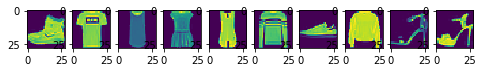

Labels of images are  [9 0 0 3 0 2 7 2 5 5]


In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(10):
    
    plt.subplot(1, 10, i + 1)
    
    plt.imshow(trainX[i,:])

plt.show()


print("Labels of images are ",trainY[0:10])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [184]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()

#Normalize input data
model.add(tf.keras.layers.Dense(15,input_shape=(784,),activation='softmax'))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy')#tf.losses.softmax_cross_entropy

### Execute the model using model.fit()

In [185]:
model.fit(trainX.reshape(60000,784), trainY_OHE, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 2.2328
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 2.0212
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 1.8622
Epoch 4/5
60000/60000 [==============================] - 6s 101us/sample - loss: 1.8202
Epoch 5/5
60000/60000 [==============================] - 6s 102us/sample - loss: 1.7738


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [192]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()

#Normalize input data
model.add(tf.keras.layers.Dense(15,input_shape=(784,),activation='softmax'))

model.add(tf.keras.layers.Dense(9,activation='relu'))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy')#tf.losses.softmax_cross_entropy

### Execute the model

In [193]:
model.fit(trainX.reshape(60000,784), trainY_OHE, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 136us/sample - loss: 2.0688
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 1.8383
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 1.7785
Epoch 4/5
60000/60000 [==============================] - 6s 104us/sample - loss: 1.7688
Epoch 5/5
60000/60000 [==============================] - 7s 110us/sample - loss: 1.7466


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [209]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()

#Normalize input data
model.add(tf.keras.layers.Dense(15,input_shape=(784,),activation='softmax'))

model.add(tf.keras.layers.Dense(9,activation='relu'))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(tf.keras.optimizers.SGD(lr=0.001), loss='categorical_crossentropy')#tf.losses.softmax_cross_entropy

In [210]:
model.fit(trainX.reshape(60000,784), trainY_OHE, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 149us/sample - loss: 2.2466
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 2.1856
Epoch 3/5
60000/60000 [==============================] - 6s 108us/sample - loss: 2.1186
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 2.0373
Epoch 5/5
60000/60000 [==============================] - 7s 113us/sample - loss: 1.9435


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [215]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()

#Normalize input data
model.add(tf.keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'))

model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(tf.keras.optimizers.SGD(lr=0.03), loss='categorical_crossentropy',metrics=['accuracy'])#tf.losses.softmax_cross_entropy

In [221]:
model.fit(trainX.reshape(60000,784), trainY_OHE, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.9466 - acc: 0.6388
Epoch 2/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.9883 - acc: 0.6112
Epoch 3/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.9718 - acc: 0.6028
Epoch 4/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.9102 - acc: 0.6470
Epoch 5/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.9273 - acc: 0.6435


## Review model

In [223]:
model.evaluate(testX.reshape(10000,784),testY_OHE)

10000/10000 [==============================] - 1s 106us/sample - loss: 0.9281 - acc: 0.6417


[0.9280871848106385, 0.6417]

<b>Model accuracy is 64.17%

### Run the model

In [225]:
predicted=model.predict(testX.reshape(10000,784))

In [226]:
predicted

array([[1.1275450e-05, 3.6593374e-05, 4.8503667e-04, ..., 6.0393386e-02,
        2.1137338e-02, 7.6492667e-01],
       [3.8655982e-03, 1.0085016e-03, 5.3000689e-01, ..., 2.9962268e-05,
        2.0076817e-02, 9.7483041e-04],
       [5.7009916e-04, 9.9148351e-01, 1.1980474e-04, ..., 8.1209801e-05,
        3.6565149e-07, 4.7922418e-05],
       ...,
       [3.2999344e-02, 3.3734512e-04, 9.8798694e-03, ..., 3.9224369e-03,
        7.7652931e-01, 3.0622673e-03],
       [4.4956449e-03, 9.3802482e-01, 1.0685856e-03, ..., 3.0281194e-04,
        8.9716104e-06, 2.1171012e-04],
       [2.7362462e-06, 2.0324063e-05, 1.5265320e-04, ..., 1.7118824e-01,
        9.0349931e-03, 1.2219905e-01]], dtype=float32)

In [227]:
import numpy as np
result_test=np.argmax(predicted,axis=1)

In [228]:
#classes predicted
result_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)